In [29]:
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

In [102]:
import datetime

from hiscar.models import Hiscar
from hiscar.models import Reparticion

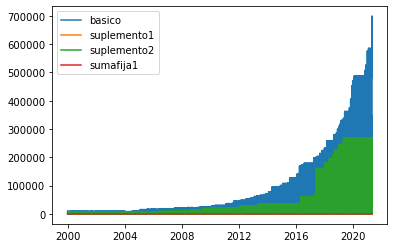

In [105]:
DATE_FORMAT = "%Y-%m-%d"

reparticiones = Reparticion.objects.filter(codigo__startswith='M1')

periodo_dd = datetime.datetime.strptime("2000-01-01", DATE_FORMAT).date()
periodo_ht = datetime.datetime.strptime("2021-05-01", DATE_FORMAT).date()

hiscar = Hiscar.objects.filter(
    reparticion_obj_id__in=[r.id for r in reparticiones],
    periodo__range=[periodo_dd, periodo_ht],
    cargo__startswith='S252'
)\
.order_by('periodo')\
.values(
    'periodo',
    'basico',
    'suplemento1',
    'suplemento2',
    'sumafija1',
    'sumafija2',
)

hiscar = [h for h in hiscar]


date_range =  [h['periodo'] for h in hiscar]

hiscar_df = pd.DataFrame(
    hiscar,
    columns=[
        'periodo',
        'basico',
        'suplemento1',
        'suplemento2',
        'sumafija1',
        'sumafija2'
    ],
    index=date_range
)


hiscar_df.to_numpy()

plt.plot(hiscar_df['basico'])
plt.plot(hiscar_df['suplemento1'])
plt.plot(hiscar_df['suplemento2'])
plt.plot(hiscar_df['sumafija1'])
#plt.plot(hiscar_df['sumafija2'])

plt.legend(['basico', 'suplemento1', 'suplemento2', 'sumafija1', 'sumafija2'])

plt.show()

